# Bharat Intern 

### Task 3

## NUMBER RECOGNITION 

Submitted by 

Gautham V A

**Number Recognition**

Handwritten digit recognition system not only detects
scanned images of handwritten digits.Handwritten digit
recognition using MNIST dataset is a major project made

with the help of Neural Network. It basically detects
the scanned images of handwritten digits.

In [38]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [40]:
# importing dataset splitting into train and test dataset

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


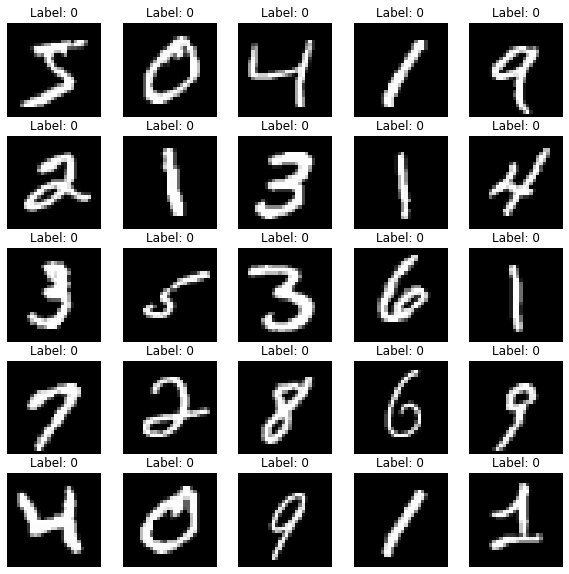

In [41]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i].argmax()}")
    plt.axis('off')

plt.show()

In [42]:
# preprocessing

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [43]:
# Building CNN(Convolutional Neural Network) model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [44]:
# Compiling the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
# Training the model

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 16s 21ms/step - loss: 0.2109 - accuracy: 0.9404 - val_loss: 0.0678 - val_accuracy: 0.9795
Epoch 2/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0536 - val_accuracy: 0.9843
Epoch 3/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0398 - val_accuracy: 0.9869
Epoch 4/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0374 - val_accuracy: 0.9885
Epoch 5/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0469 - val_accuracy: 0.9861


In [46]:
# model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [47]:
# Model evaluation

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.9874
Test accuracy: 0.9873999953269958


In [48]:
def recognize_digit(image):
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    digit = np.argmax(prediction)
    return digit


1/1 [==============================] - 0s 14ms/step


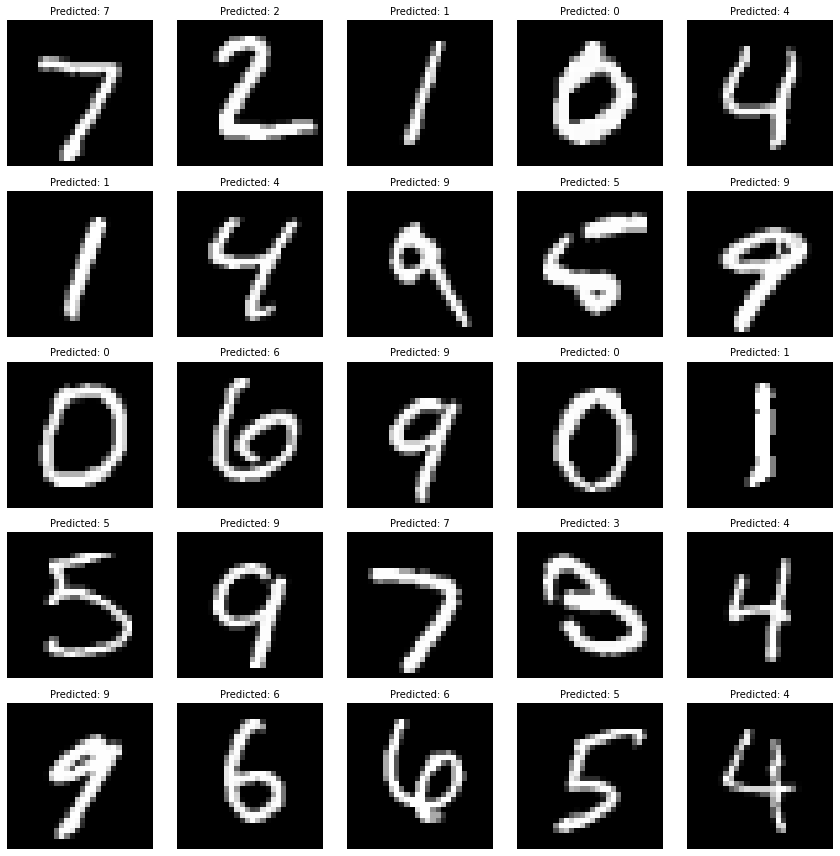

In [49]:
plt.figure(figsize=(12, 12))
for i in range(len(test_images)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    predicted_digit = recognize_digit(test_images[i])
    plt.title(f"Predicted: {predicted_digit}", fontsize=10)
    plt.axis('off')

    if i >= 24:
        break

plt.tight_layout()
plt.show()

**Conclusion**

The provided code demonstrates a number recognition system using a Convolutional Neural Network (CNN) trained on the MNIST dataset, which is a popular benchmark for handwritten digit recognition. 
 The MNIST dataset, consisting of 60,000 training images and 10,000 test images of handwritten digits, is loaded and preprocessed. The images are reshaped to (28, 28, 1) and normalized to values between 0 and 1. Labels are one-hot encoded.
  A CNN model is constructed using TensorFlow and Keras. It comprises convolutional layers, max-pooling layers, and dense layers. This architecture is designed to capture features in the digit images and make predictions.
The model is compiled and trained on the training dataset. Training is performed over 5 epochs with a batch size of 64 and a validation split of 20%.
The model's performance is evaluated on the test dataset, resulting in a test accuracy score.
 The model is used to predict digits from the test dataset, and the predictions are displayed alongside the corresponding test images.

The code successfully trains a neural network to recognize handwritten digits and provides visual feedback on the model's predictions.

